<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/PricePrediction/goldprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Import
import numpy as np
import pandas_datareader as pdr
import math
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from keras.layers import Dense, LSTM
from keras.models import Sequential
plt.style.use('fivethirtyeight')
from google.colab import files 
from datetime import datetime
import seaborn as sns

In [ ]:
files.upload()

In [88]:
data = pd.read_csv('gold.csv')
data.head(5)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [89]:
data['year'] = data['Date']
data['month'] = data['Date']
for i in range(0,847):
  dt = datetime.strptime(data['Date'][i],'%Y-%m')
  data['Date'][i] = dt
  data['year'][i] = dt.year
  data['month'][i] = dt.month
data = data.set_index('Date')
data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Price,year,month
Date,,,
1950-01-01,34.73,1950,1
1950-02-01,34.73,1950,2
1950-03-01,34.73,1950,3
1950-04-01,34.73,1950,4
1950-05-01,34.73,1950,5


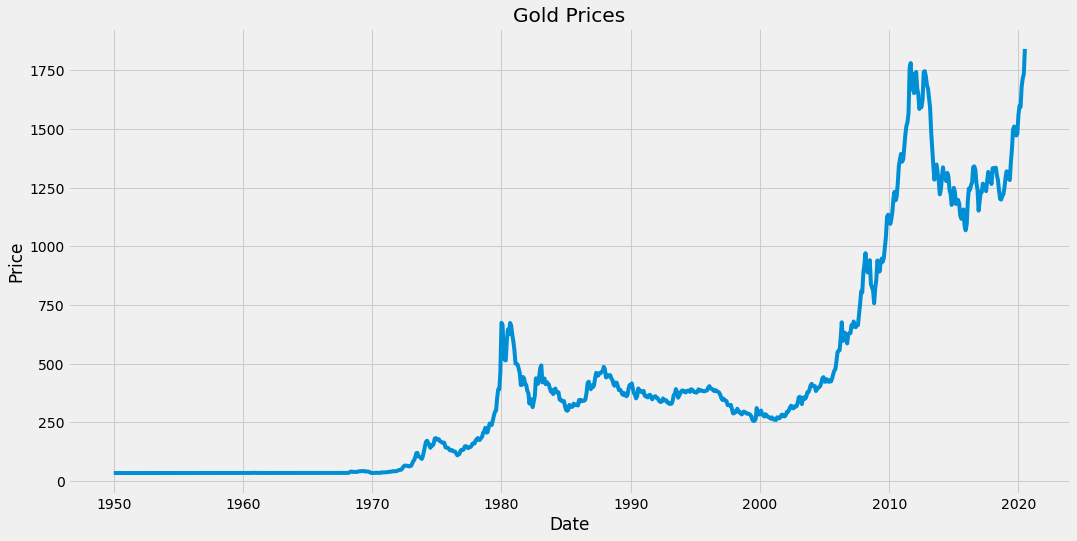

In [90]:
plt.figure(figsize=(16,8))
plt.title('Gold Prices')
plt.xlabel('Date', fontsize=17)
plt.ylabel ('Price', fontsize=17)
plt.plot(data['Price'])
plt.show()

In [116]:
trainX,testX,trainY,testY = tts(data.drop(columns=['Price']),data['Price'],shuffle=False,test_size=0.10)

In [117]:
trainX = np.asarray(trainX).astype(np.float32)
testX = np.asarray(testX).astype(np.float32)
trainY = np.asarray(trainY).astype(np.float32)
testY = np.asarray(testY).astype(np.float32)

In [118]:
trainX = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0],trainX.shape[1],1))
trainX.shape

(762, 2, 1)

In [133]:
#build LSTM architecture
arch = Sequential()
arch.add(LSTM(100, return_sequences = True, input_shape = (trainX.shape[1],1)))
arch.add(LSTM(100, return_sequences = False))
arch.add(Dense(32))
arch.add(Dense(32))
arch.add(Dense(16))
arch.add(Dense(1))
#compile
arch.compile(optimizer='adam', loss = 'mean_squared_error')

In [134]:
arch.fit(trainX, trainY, batch_size = 8, epochs = 20)

Epoch 1/20
96/96 [==============================] - 4s 5ms/step - loss: 215861.6429
Epoch 2/20
96/96 [==============================] - 1s 5ms/step - loss: 133309.0462
Epoch 3/20
96/96 [==============================] - 1s 5ms/step - loss: 136600.9751
Epoch 4/20
96/96 [==============================] - 1s 5ms/step - loss: 122856.7798
Epoch 5/20
96/96 [==============================] - 1s 6ms/step - loss: 125936.5513
Epoch 6/20
96/96 [==============================] - 1s 6ms/step - loss: 154937.9002
Epoch 7/20
96/96 [==============================] - 1s 6ms/step - loss: 124722.5305
Epoch 8/20
96/96 [==============================] - 1s 6ms/step - loss: 114114.8615
Epoch 9/20
96/96 [==============================] - 1s 6ms/step - loss: 108260.0748
Epoch 10/20
96/96 [==============================] - 1s 6ms/step - loss: 119881.9930
Epoch 11/20
96/96 [==============================] - 1s 6ms/step - loss: 129174.5621
Epoch 12/20
96/96 [==============================] - 1s 5ms/step - loss: 1

In [135]:
predictions = arch.predict(testX)

In [136]:
predictions = np.reshape(predictions,(predictions.size,))

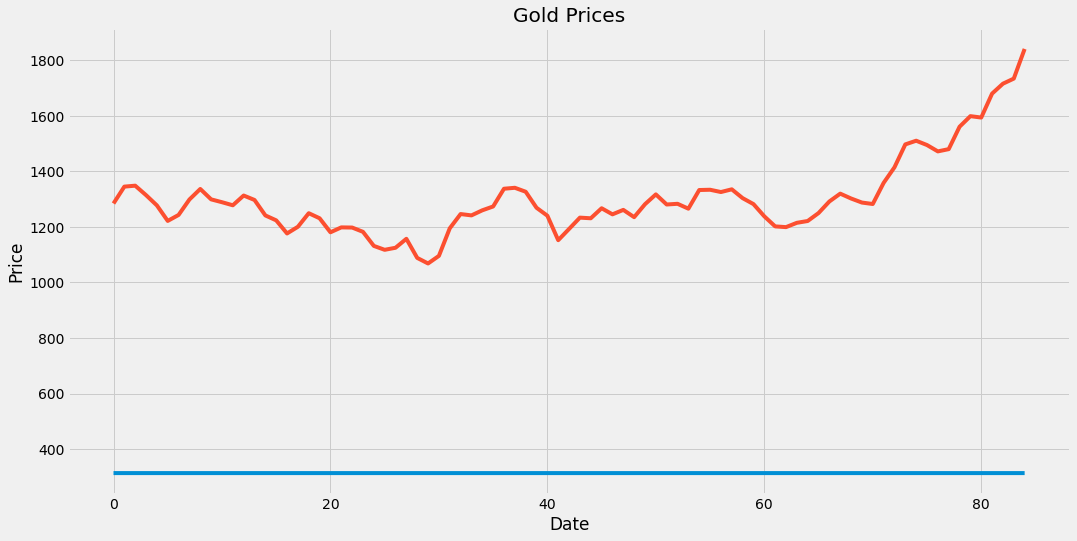

In [137]:
plt.figure(figsize=(16,8))
plt.title('Gold Prices')
plt.xlabel('Date', fontsize=17)
plt.ylabel ('Price', fontsize=17)
plt.plot(predictions)
plt.plot(testY)
plt.show()